In [516]:
#Libraries to be install
import numpy as np
import math
import graphviz as gv
from graphviz import Digraph
import random
import time
import matplotlib.pyplot as plt
random.seed(42)

In [517]:
class nerualNetwork:
    def __init__(self, numIn, numLayers, numOut, actFunc, lossFunc, bias):
        self.numIn = numIn
        self.numLayers = numLayers 
        self.numOut = numOut
        self.input = np.zeros((numIn, 1))
        self.layers = [np.zeros((num, 1)) for num in self.numLayers]
        self.output = np.zeros((numOut, 1))
        self.layerWeights = []
        self.network = []
        self.actFunc = actFunc
        self.lossFunc = lossFunc
        self.bias = bias
        self.construct()

    def copy(self):
        import copy
        return copy.deepcopy(self)
    
    def printSpecs(self):
        print("Inputs",self.input.shape,":\n",self.input)
        print("Output",self.output.shape,":\n",self.output)
        [print("Layers",[index],": \n",layer) for index, layer in enumerate(self.layers)]
        [print("Weights[",index,"]: \n",weight) for index, weight in enumerate(self.layerWeights)]
        [print("weight",weight.shape,":)") for weight in self.layerWeights]
        [print("NETWORK[",index,"]: \n",net) for index, net in enumerate(self.network)]
    
    def construct(self):
        NN = []
        newNN = []
        NN.append(self.input)
        NN+=self.layers
        NN.append(self.output)
        newNN = NN.copy()
        k = 1
        for i in range(len(NN)):
            if i+1 < len(NN):
                x = np.random.rand((NN[i].shape[0])*NN[i+1].shape[0],1)
                self.layerWeights.append(x)
                newNN.insert(i+k,x)
                k+=1
        self.network = newNN
    

    def draw_dot(self):
        dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'})  # LR = left to right
       

        listNodes = []
        nodeNum = 0
        for index, nodeList in enumerate(self.network):
            if index % 2 == 0:
                nodes = []
                for node in nodeList:
                    dot.node(name=str(id(nodeNum)), label=f"value: {node[0]:.4f}", shape='circle')
                    nodes.append(nodeNum)
                    nodeNum+=1
                listNodes.append(nodes)
                
        for index, weights in enumerate(self.network):
            if index % 2 != 0:
                w = weights.tolist()
                a = self.network[index-1].tolist()
                b = self.network[index+1].tolist()
                c = len(min(a,b))
                d = len(max(a,b))
                for i in range(c):
                    chunk = weights[i:i+d].tolist()
                    for node1 in listNodes[i]:
                            for node2 in listNodes[i+1]:
                                    dot.edge(str(id(node1)), str(id(node2)), label=f"w: {w[0][0]:.4f}")
                                    w.pop(0)
                    if len(w) == 0:
                        listNodes.pop(0)
                        break
        return dot

In [518]:
x = np.array([[1],[2]])
x.shape
x[1,0]

2

In [519]:
x = 0 % 2
print(x)

0


In [520]:
ANDgateModel = nerualNetwork(3,[],1,"Sigmoid","CrossEntropy",1)
ANDgateModel.input = np.array([[1],[2],[3]])
ANDgateModel.layers = []
ANDgateModel.layers.append(np.array([[4],[5]]))
ANDgateModel.output = np.array([[6]])
ANDgateModel.layerWeights = []
ANDgateModel.construct()

In [521]:
ANDgateModel.printSpecs()

Inputs (3, 1) :
 [[1]
 [2]
 [3]]
Output (1, 1) :
 [[6]]
Layers [0] : 
 [[4]
 [5]]
Weights[ 0 ]: 
 [[0.67727406]
 [0.8325837 ]
 [0.20676878]
 [0.66886134]
 [0.86138719]
 [0.03026237]]
Weights[ 1 ]: 
 [[0.95463326]
 [0.45817993]]
weight (6, 1) :)
weight (2, 1) :)
NETWORK[ 0 ]: 
 [[1]
 [2]
 [3]]
NETWORK[ 1 ]: 
 [[0.67727406]
 [0.8325837 ]
 [0.20676878]
 [0.66886134]
 [0.86138719]
 [0.03026237]]
NETWORK[ 2 ]: 
 [[4]
 [5]]
NETWORK[ 3 ]: 
 [[0.95463326]
 [0.45817993]]
NETWORK[ 4 ]: 
 [[6]]


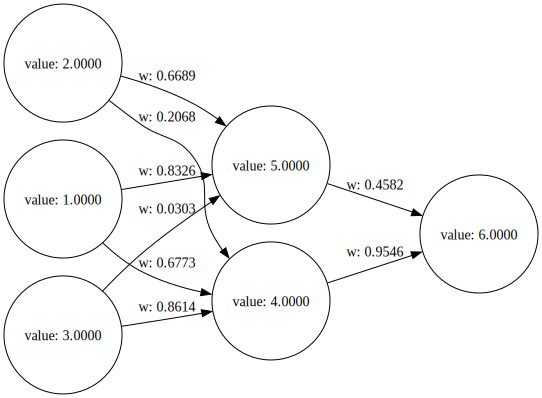

In [522]:
ANDgateModel.draw_dot()